# Car Pricing Analysis

## Introduction

This project analyzes car pricing data from the 1985 Ward's Automotive Yearbook.  
The dataset is publicly available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/10/automobile).

## Importing Libraries

In [48]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the Raw Dataset

In [49]:
# Load the dataset from the provided URL
data_source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
car_db = pd.read_csv(data_source, header=None)  # The raw dataset has no headers

# Save the raw dataset to a CSV file (optional)
#car_db.to_csv('raw_cardb.csv', index=False)  ## Uncomment this line if you want to save the file.

# Uncomment the line below to load the dataset from the saved 'raw_cardb.csv' file
# car_db = pd.read_csv('raw_cardb.csv')

In [50]:
car_db.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## Data Preprocessing

In [51]:
# Add headers to the dataset based on the dataset description
headers = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
    "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"
]

car_db.columns = headers

# Display the first 12 rows of the dataset
car_db.head(12)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [52]:
# Replace missing values ('?') with NaN
car_db.replace('?', np.nan, inplace=True)

# Display the first 12 rows of the dataset after replacing missing values
car_db.head(12)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [53]:
# Count the missing data for each column
missing_values = car_db.isnull()  # Returns True (1) if the value is missing.
for column in missing_values.columns.to_list():
    print(f"Missing values in column '{column}':")
    print(missing_values[column].value_counts())
    print('')

Missing values in column 'symboling':
symboling
False    205
Name: count, dtype: int64

Missing values in column 'normalized-losses':
normalized-losses
False    164
True      41
Name: count, dtype: int64

Missing values in column 'make':
make
False    205
Name: count, dtype: int64

Missing values in column 'fuel-type':
fuel-type
False    205
Name: count, dtype: int64

Missing values in column 'aspiration':
aspiration
False    205
Name: count, dtype: int64

Missing values in column 'num-of-doors':
num-of-doors
False    203
True       2
Name: count, dtype: int64

Missing values in column 'body-style':
body-style
False    205
Name: count, dtype: int64

Missing values in column 'drive-wheels':
drive-wheels
False    205
Name: count, dtype: int64

Missing values in column 'engine-location':
engine-location
False    205
Name: count, dtype: int64

Missing values in column 'wheel-base':
wheel-base
False    205
Name: count, dtype: int64

Missing values in column 'length':
length
False    205
Nam

### Replacing Missing Values with Mean

The following columns have missing values that will be replaced with their respective means:
- **normalized-losses**: 41 missing values
- **stroke**: 4 missing values
- **bore**: 4 missing values
- **horsepower**: 2 missing values
- **peak-rpm**: 2 missing values

In [54]:
avg_nl=car_db['normalized-losses'].astype('float').mean(axis=0)
avg_stroke=car_db['stroke'].astype('float').mean(axis=0)
avg_bore=car_db['bore'].astype('float').mean(axis=0)
avg_h=car_db['horsepower'].astype('float').mean(axis=0)
avg_pr=car_db['peak-rpm'].astype('float').mean(axis=0)

print("Average of normalized-losses:", avg_nl)
print("Average of stroke:", avg_stroke)
print("Average of bore:", avg_bore)
print("Average horsepower:", avg_h)
print("Average peak rpm:", avg_pr)

Average of normalized-losses: 122.0
Average of stroke: 3.255422885572139
Average of bore: 3.3297512437810943
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [55]:
car_db.fillna({'normalized-losses': avg_nl, 'stroke': avg_stroke, 'bore': avg_bore, 'horsepower': avg_h, 'peak-rpm': avg_pr}, inplace=True)

In [56]:
car_db['num-of-doors'].value_counts().to_frame()

,count
num-of-doors,
four,114
two,89


Replace by frequency:
- **num-of-doors**: 2 missing data, replace them with "four". 
	- Reason: since four doors is most frequent, it is most likely to occur.

In [57]:
car_db.fillna({'num-of-doors':'four'}, inplace=True)

Drop the whole row:
- **price**: 4 missing data, simply delete the whole row since is the value that we want to predict the future.


In [58]:
car_db.dropna(subset=['price'], axis=0, inplace=True)

In [59]:
#Here we see that the entire 9th row was deleted because the price was missing.
car_db.iloc[7:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [60]:
#Reset index, because we droped two rows.
car_db.reset_index(drop=True, inplace=True)
car_db.iloc[7:11]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [61]:
#Now, we review the data format 
car_db.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Convert data types to proper format

In [62]:
car_db[['bore','stroke','peak-rpm','price']]=car_db[['bore','stroke','peak-rpm','price']].astype('float')
car_db[['normalized-losses','horsepower']]=car_db[['normalized-losses','horsepower']].astype('int64')
car_db[['normalized-losses','horsepower','bore','stroke','peak-rpm','price']].dtypes

normalized-losses      int64
horsepower             int64
bore                 float64
stroke               float64
peak-rpm             float64
price                float64
dtype: object

### Data Standardization

In [63]:
# Convert 'city-mpg' and 'highway-mpg' to 'city-km/L' and 'highway-km/L' using the conversion factor 1 mpg = 0.425 km/L
car_db[['city-km/L','highway-km/L']]=car_db[['city-mpg','highway-mpg']]*0.425 

car_db[['city-km/L','city-mpg','highway-km/L','highway-mpg']]

,city-km/L,city-mpg,highway-km/L,highway-mpg
0,8.925,21,11.475,27
1,8.925,21,11.475,27
2,8.075,19,11.050,26
3,10.200,24,12.750,30
4,7.650,18,9.350,22
...,...,...,...,...
196,9.775,23,11.900,28
197,8.075,19,10.625,25
198,7.650,18,9.775,23
199,11.050,26,11.475,27


In [64]:
#Then, we transform the columns 'length','width' and 'height' from inches to cm
car_db[['length-cm','width-cm','height-cm']]=car_db[['length','width','height']]*2.54

car_db[['length-cm','length','width-cm','width','height-cm','height']]

,length-cm,length,width-cm,width,height-cm,height
0,428.752,168.8,162.814,64.1,123.952,48.8
1,428.752,168.8,162.814,64.1,123.952,48.8
2,434.848,171.2,166.370,65.5,133.096,52.4
3,448.564,176.6,168.148,66.2,137.922,54.3
4,448.564,176.6,168.656,66.4,137.922,54.3
...,...,...,...,...,...,...
196,479.552,188.8,175.006,68.9,140.970,55.5
197,479.552,188.8,174.752,68.8,140.970,55.5
198,479.552,188.8,175.006,68.9,140.970,55.5
199,479.552,188.8,175.006,68.9,140.970,55.5


### Data Normalization

We normalize the values to bring the variables to a similar range.

In [65]:
#We replace (original value) by (original value)/(maximum value)
car_db[['length-cm','width-cm','height-cm']]=car_db[['length-cm','width-cm','height-cm']]/car_db[['length-cm','width-cm','height-cm']].max()

car_db[['length-cm','width-cm','height-cm']]

,length-cm,width-cm,height-cm
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


### Binning Data

We binning the horsepower into a categorical group to analyse.

bins interval : [ 48.         119.33333333 190.66666667 262.        ]

bin-horsepower
little            153
medium             43
high                5
Name: count, dtype: int64


Text(0.5, 1.0, 'Horsepower Bins')

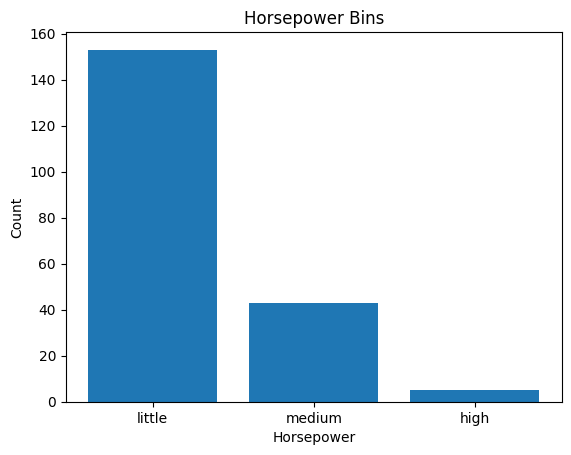

In [66]:
#We bin into a high horsepower, medium horsepower and little horsepower

bin_label=['little','medium','high'] #Naming the categories for the bins
bins=np.linspace(car_db['horsepower'].min(),car_db['horsepower'].max(),num=4) #we divide the column in 3 categories. num=(bins+1)
car_db['bin-horsepower']=pd.cut(car_db['horsepower'],bins=bins, labels=bin_label,include_lowest=True) #creating the new categorycal column 

#print the limits values and total values for each bin
print('bins interval :',bins) #[48-119.33], (119.33-190.67], (190.67-262]
print('')
print(car_db[['bin-horsepower']].value_counts())

#Plot the new column
plt.bar(bin_label,car_db['bin-horsepower'].value_counts()) 

# set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")


### Indicator Variable

In [67]:
#Since column 'fuel-type' has two unique values 'gas' 'diesel' and regression need numerical values
#  we convert this category to indicator variable (True, False).
dummy_fuel_type= pd.get_dummies(car_db['fuel-type'])
dummy_fuel_type.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'}, inplace=True)

#We do the same to the 'aspiration' column with categories 'std' and 'turbo'
dummy_aspiration=pd.get_dummies(car_db['aspiration'])
dummy_aspiration.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)

#concat the columns to the dataset
car_db=pd.concat([car_db,dummy_fuel_type,dummy_aspiration], axis= 1)

#show the columns obteined
print(dummy_fuel_type.head(5))
print('')
print(dummy_aspiration.head(5))
print('')

#show data into dataset
car_db[['fuel-type-diesel','fuel-type-gas', 'aspiration-std','aspiration-turbo']].head(5)

   fuel-type-diesel  fuel-type-gas
0             False           True
1             False           True
2             False           True
3             False           True
4             False           True

   aspiration-std  aspiration-turbo
0            True             False
1            True             False
2            True             False
3            True             False
4            True             False



,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False


In [68]:
#We drop all the columns modified 
car_db.drop(['city-mpg','highway-mpg','length','width','height','fuel-type','aspiration'],axis=1,inplace=True)
car_db.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price',
       'city-km/L', 'highway-km/L', 'length-cm', 'width-cm', 'height-cm',
       'bin-horsepower', 'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

### Saving Clean Dataset (optional)

In [ ]:
#car_db.to_csv('clean_cardb.csv',index=False) 

## Exploratory Data Analysis (EDA)

To choose the right visualization it is important to first understand the type of data to find the graph that will help us.


In [70]:
# Calculate the correlation between variables of type 'int64' and 'float64'
numeric_df = car_db.select_dtypes(include=['float64', 'int64'])
print("Numeric columns in the dataset:")
print(numeric_df.columns)

# Pearson Correlation
# Compute the correlation matrix for selected numeric variables
correlation_matrix = numeric_df[['price', 'horsepower', 'city-km/L', 'highway-km/L',
								 'engine-size', 'curb-weight', 'width-cm', 'length-cm']].corr()
print("\nPearson Correlation Matrix:")
print(correlation_matrix)

Numeric columns in the dataset:
Index(['symboling', 'normalized-losses', 'wheel-base', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'price', 'city-km/L', 'highway-km/L', 'length-cm',
       'width-cm', 'height-cm'],
      dtype='object')

Pearson Correlation Matrix:
                 price  horsepower  city-km/L  highway-km/L  engine-size  \
price         1.000000    0.809607  -0.686571     -0.704692     0.872335   
horsepower    0.809607    1.000000  -0.822192     -0.804579     0.822668   
city-km/L    -0.686571   -0.822192   1.000000      0.972044    -0.650546   
highway-km/L -0.704692   -0.804579   0.972044      1.000000    -0.679571   
engine-size   0.872335    0.822668  -0.650546     -0.679571     1.000000   
curb-weight   0.834415    0.757981  -0.749543     -0.794889     0.849072   
width-cm      0.751265    0.615056  -0.633531     -0.680635     0.729436   
length-cm     0.690628    0.579795  -0.665192     -0.698142  

### Continuous Numerical Variables

#### Engine Size

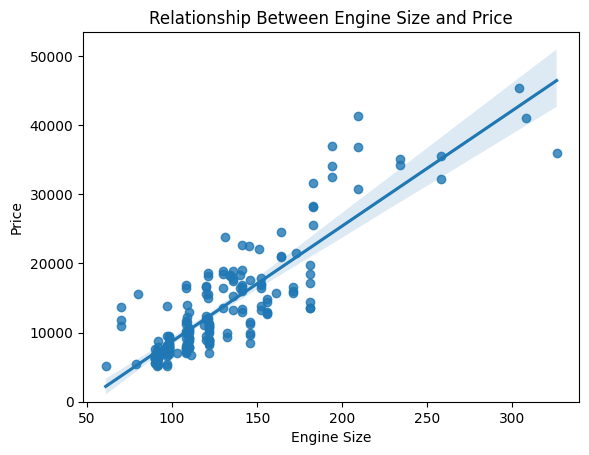

In [71]:
# Analyze engine size as a potential predictor of price
sns.regplot(x="engine-size", y="price", data=car_db)
plt.ylim(0,)
plt.title("Relationship Between Engine Size and Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()


In [72]:
ez_pearson_coef,ez_p_value = stats.pearsonr(car_db['engine-size'],car_db['price'])
print("Pearson Correlation Coefficient:", ez_pearson_coef)
print("P-value= ", ez_p_value) 

Pearson Correlation Coefficient: 0.8723351674455185
P-value=  9.265491622198827e-64


Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

#### Curb Weight

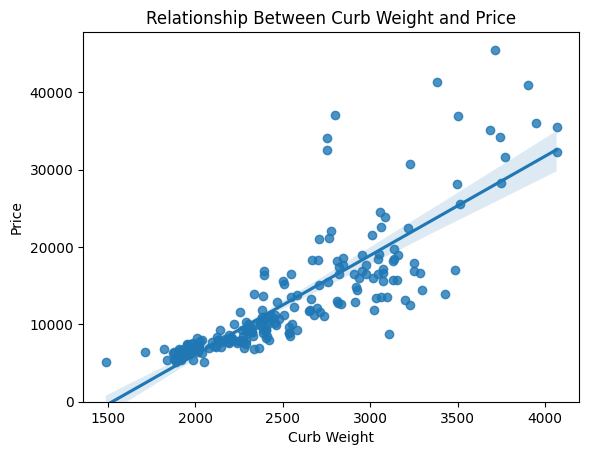

In [73]:
# Analyze curb weight as a potential predictor of price.
sns.regplot(x='curb-weight',y='price',data=car_db)
plt.ylim(0,)
plt.title("Relationship Between Curb Weight and Price")
plt.xlabel("Curb Weight")
plt.ylabel("Price")
plt.show()

In [74]:
cw_pearson_coef,cw_p_value = stats.pearsonr(car_db['curb-weight'],car_db['price'])
print("Pearson Correlation Coefficient:", cw_pearson_coef)
print("P-value= ", cw_p_value) 

Pearson Correlation Coefficient: 0.8344145257702845
P-value=  2.1895772388939584e-53


Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

#### Horsepower

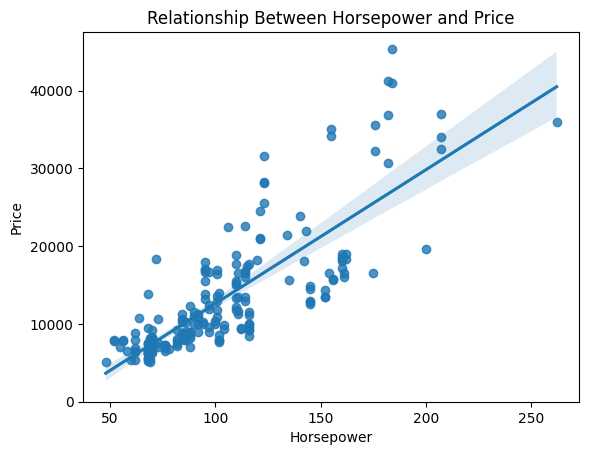

In [75]:
# Analyze horsepower as a potential predictor of price.
sns.regplot(x='horsepower',y='price',data=car_db)
plt.ylim(0,)
plt.title("Relationship Between Horsepower and Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

In [76]:
hp_pearson_coef,hp_p_value = stats.pearsonr(car_db['horsepower'],car_db['price'])
print("Pearson Correlation Coefficient:", hp_pearson_coef)
print("P-value= ", hp_p_value) 

Pearson Correlation Coefficient: 0.8096068016571054
P-value=  6.27353627065033e-48


Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

#### Highway km/L

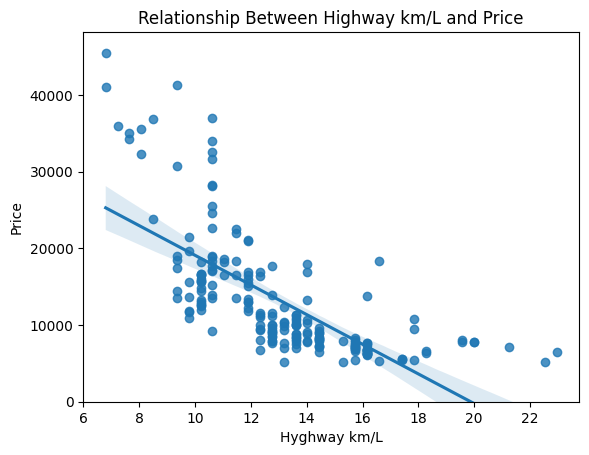

In [77]:
# Analyze highway km/L as a potential predictor of price.
sns.regplot(x='highway-km/L',y='price',data=car_db)
plt.ylim(0,)
plt.title("Relationship Between Highway km/L and Price")
plt.xlabel("Hyghway km/L")
plt.ylabel("Price")
plt.show()

In [78]:
hkmL_pearson_coef,hkmL_p_value = stats.pearsonr(car_db['highway-km/L'],car_db['price'])
print("Pearson Correlation Coefficient:", hkmL_pearson_coef)
print("P-value= ", hkmL_p_value) 

Pearson Correlation Coefficient: -0.704692265058953
P-value=  1.7495471144475605e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

#### City km/L

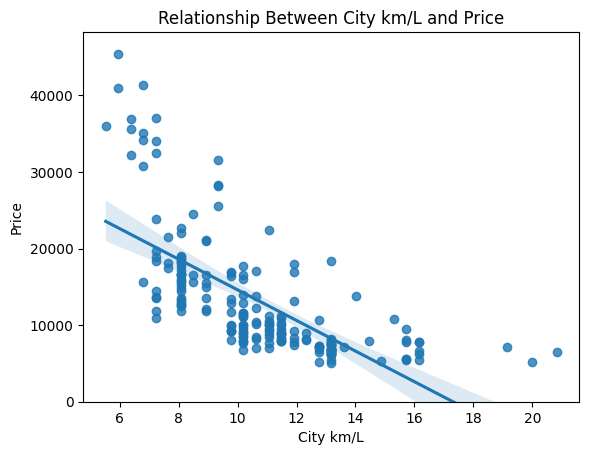

In [79]:
# Analyze city km/L as a potential predictor of price.
sns.regplot(x='city-km/L',y='price',data=car_db)
plt.ylim(0,)
plt.title("Relationship Between City km/L and Price")
plt.xlabel("City km/L")
plt.ylabel("Price")
plt.show()

In [80]:
ckmL_pearson_coef,ckmL_p_value = stats.pearsonr(car_db['city-km/L'],car_db['price'])
print("Pearson Correlation Coefficient:", ckmL_pearson_coef)
print("P-value= ", ckmL_p_value) 

Pearson Correlation Coefficient: -0.6865710067844679
P-value=  2.3211320655674997e-29


Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

#### Length

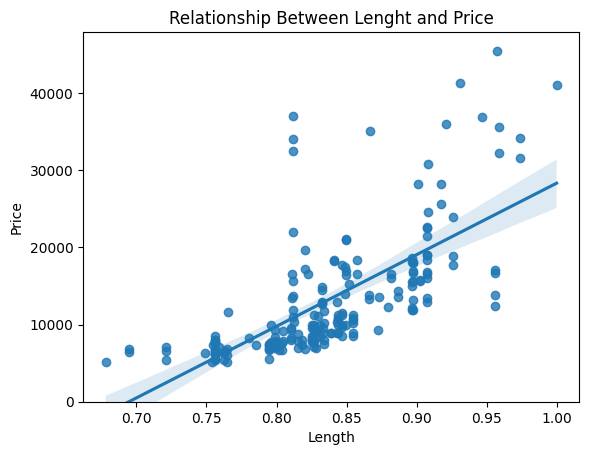

In [81]:
# Analyze length as a potential predictor of price.
sns.regplot(x='length-cm',y='price',data=car_db)
plt.ylim(0,)
plt.title("Relationship Between Lenght and Price")
plt.xlabel("Length")
plt.ylabel("Price")
plt.show()

In [82]:
lcm_pearson_coef,lcm_p_value = stats.pearsonr(car_db['length-cm'],car_db['price'])
print("Pearson Correlation Coefficient:", lcm_pearson_coef)
print("P-value= ", lcm_p_value) 

Pearson Correlation Coefficient: 0.6906283804483642
P-value=  8.016477466158771e-30


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

#### Width

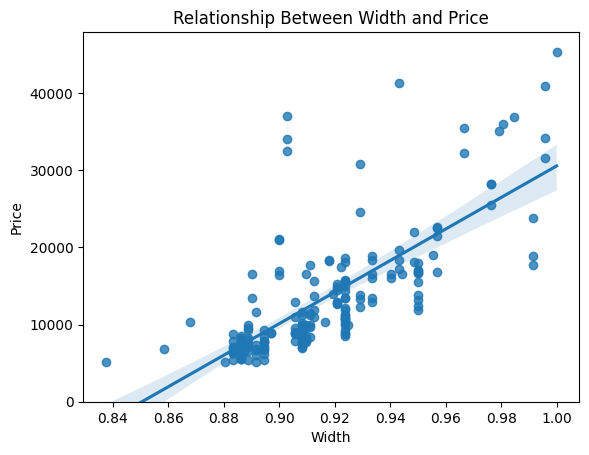

In [83]:
# Analyze width as a potential predictor of price.
sns.regplot(x='width-cm',y='price',data=car_db)
plt.ylim(0,)
plt.title("Relationship Between Width and Price")
plt.xlabel("Width")
plt.ylabel("Price")
plt.show()

In [84]:
wcm_pearson_coef,wcm_p_value = stats.pearsonr(car_db['width-cm'],car_db['price'])
print("Pearson Correlation Coefficient:", wcm_pearson_coef)
print("P-value= ", wcm_p_value)

Pearson Correlation Coefficient: 0.7512653440522671
P-value=  9.200335510482045e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Categorical Variables

#### Body Style

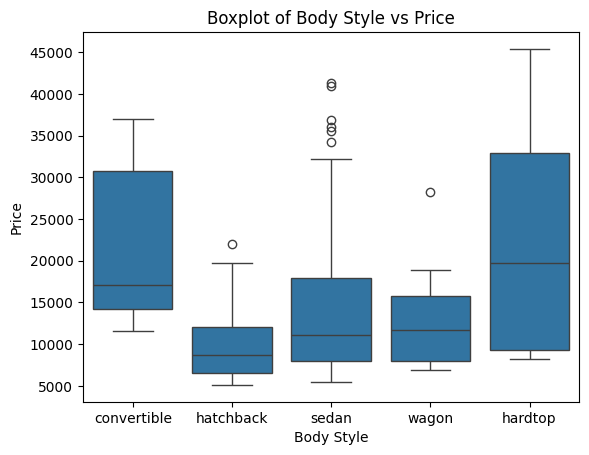

In [85]:
# Analyze body style as a potential predictor of price
sns.boxplot(x='body-style',y='price',data=car_db)
plt.title("Boxplot of Body Style vs Price")
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.show()

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

#### Engine Location

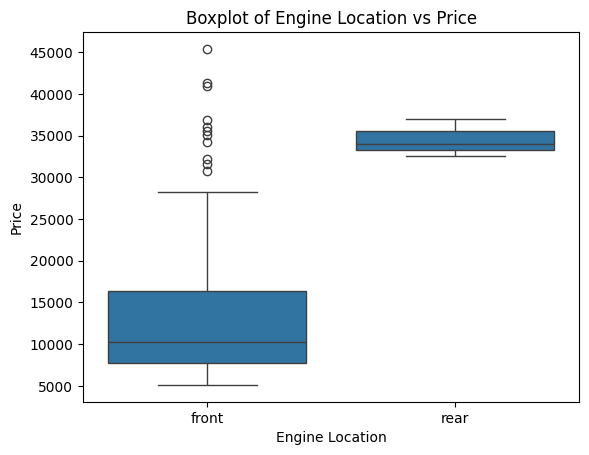

In [86]:
# Analyze engine location as a potential predictor of price
sns.boxplot(x='engine-location',y='price',data=car_db)
plt.title("Boxplot of Engine Location vs Price")
plt.xlabel("Engine Location")
plt.ylabel("Price")
plt.show()

the distributions are distinct enough to take as a potential good predictor. Then, we count the values to confirm if this category will be a good predictor.

In [87]:
engine_loc_count=car_db['engine-location'].value_counts().to_frame()
engine_loc_count.rename(columns={'count':'Total'}, inplace=True)
engine_loc_count.index.name='engine-location'
engine_loc_count

,Total
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

#### Drive Wheels

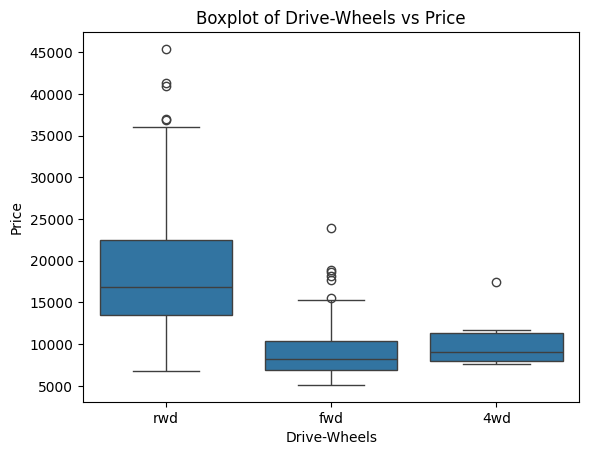

In [88]:
# Analyze drive-wheels as a potential predictor of price
sns.boxplot(x="drive-wheels", y="price", data=car_db)
plt.title("Boxplot of Drive-Wheels vs Price")
plt.xlabel("Drive-Wheels")
plt.ylabel("Price")
plt.show()

The distributions are distinct enough to consider this as a potential predictor.

In [89]:
drive_wheels_count=car_db['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns={'count':'Total'}, inplace=True)
drive_wheels_count.index.name='drive-wheels'
drive_wheels_count

,Total
drive-wheels,
fwd,118
rwd,75
4wd,8


Drive wheels continue being a probably predictor of the price.

In [90]:
group=car_db[['drive-wheels','price']]
grouped=group.groupby(['drive-wheels'],as_index=False).mean()
grouped.rename(columns={'price':'avg-price'}, inplace=True)
grouped

,drive-wheels,avg-price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### Conclusion: Key Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

- **Curb-weight**
- **Engine-size**
- **Horsepower**
- **City-km/L** 
- **Highway-km/L**
- **Length-cm**
- **width-cm**

Categorical variables:

- **Drive-wheel** 

As we move into building machine learning models, using variables that significantly affect the target variable will improve prediction performance

## Annex

### Group By

In [91]:
group_1=car_db[['drive-wheels','body-style','price']]
grouped_1=group_1.groupby(['drive-wheels'],as_index=False).agg({'price':'mean'}) #.agg beacause left more than one columns in te group
grouped_2=group_1.groupby(['drive-wheels','body-style'],as_index=False).mean()  #.mean() beacause only left column 'price' otherwise .agg
grouped_pivot=grouped_2.pivot(index='drive-wheels',columns='body-style')
grouped_pivot.columns = grouped_pivot.columns.set_levels(['avg-price'], level=0) #To set the name of the main column 'price' to 'avg-price'
grouped_pivot.fillna(0)


avg-price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Heatmap Visualization

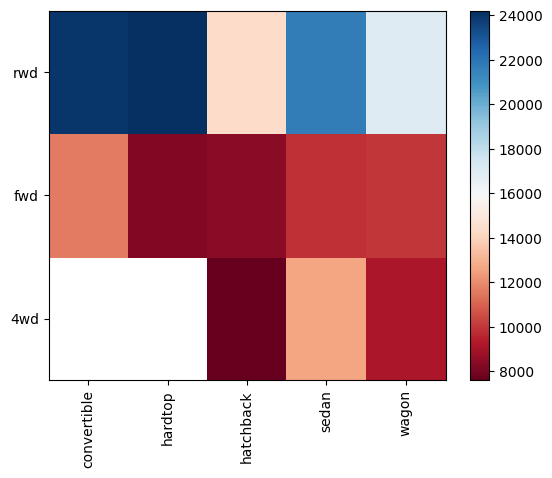

In [92]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()